### The goal of this project to find an ideal model to predict whether an Home Equity Loan will Default or will it be paid off.

# The data was obtained from kaggle.
# Here is a link to the dataset-https://www.kaggle.com/datasets/ajay1735/hmeq-data


### The data is a classification dataset and I will be running three different supervised machine learning models, which are Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier.

### Import the neccesary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
hmeq_df = pd.read_csv('/content/hmeq.csv')

### We see that are dataset has missing values so we will need to address before we run our machine learning models.

In [ ]:
hmeq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
hmeq_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


### Doing some research in underwritting knowing the Loan to Value ratio is important so I created a new variable called LTV

In [ ]:
hmeq_df['LTV'] = (hmeq_df['MORTDUE'] + hmeq_df['LOAN']) / hmeq_df['VALUE']

In [ ]:
hmeq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
 13  LTV      5357 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [ ]:
hmeq_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0.690839
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1.043173
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0.898204
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0.888393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1.620713
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1.544874
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1.541529
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1.525892


Drop Values with NAN in all selected variables

In [ ]:
hmeq_df2 = hmeq_df.copy()

In [ ]:
columns = ['JOB', 'DEROG', 'DELINQ', 'NINQ', 'DEBTINC', 'CLAGE', 'CLNO']
df_cleaned = hmeq_df2.dropna(subset= columns, how= 'all')
df_cleaned.shape

(5940, 14)

In [ ]:
df_cleaned.isnull().sum()/len(hmeq_df)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.540268
VALUE       1.828859
REASON      4.010067
JOB         4.345638
YOJ         8.372483
DEROG      11.543624
DELINQ      9.395973
CLAGE       4.832215
NINQ        8.221477
CLNO        3.389262
DEBTINC    20.922819
LTV         9.949664
dtype: float64

Check Skewness

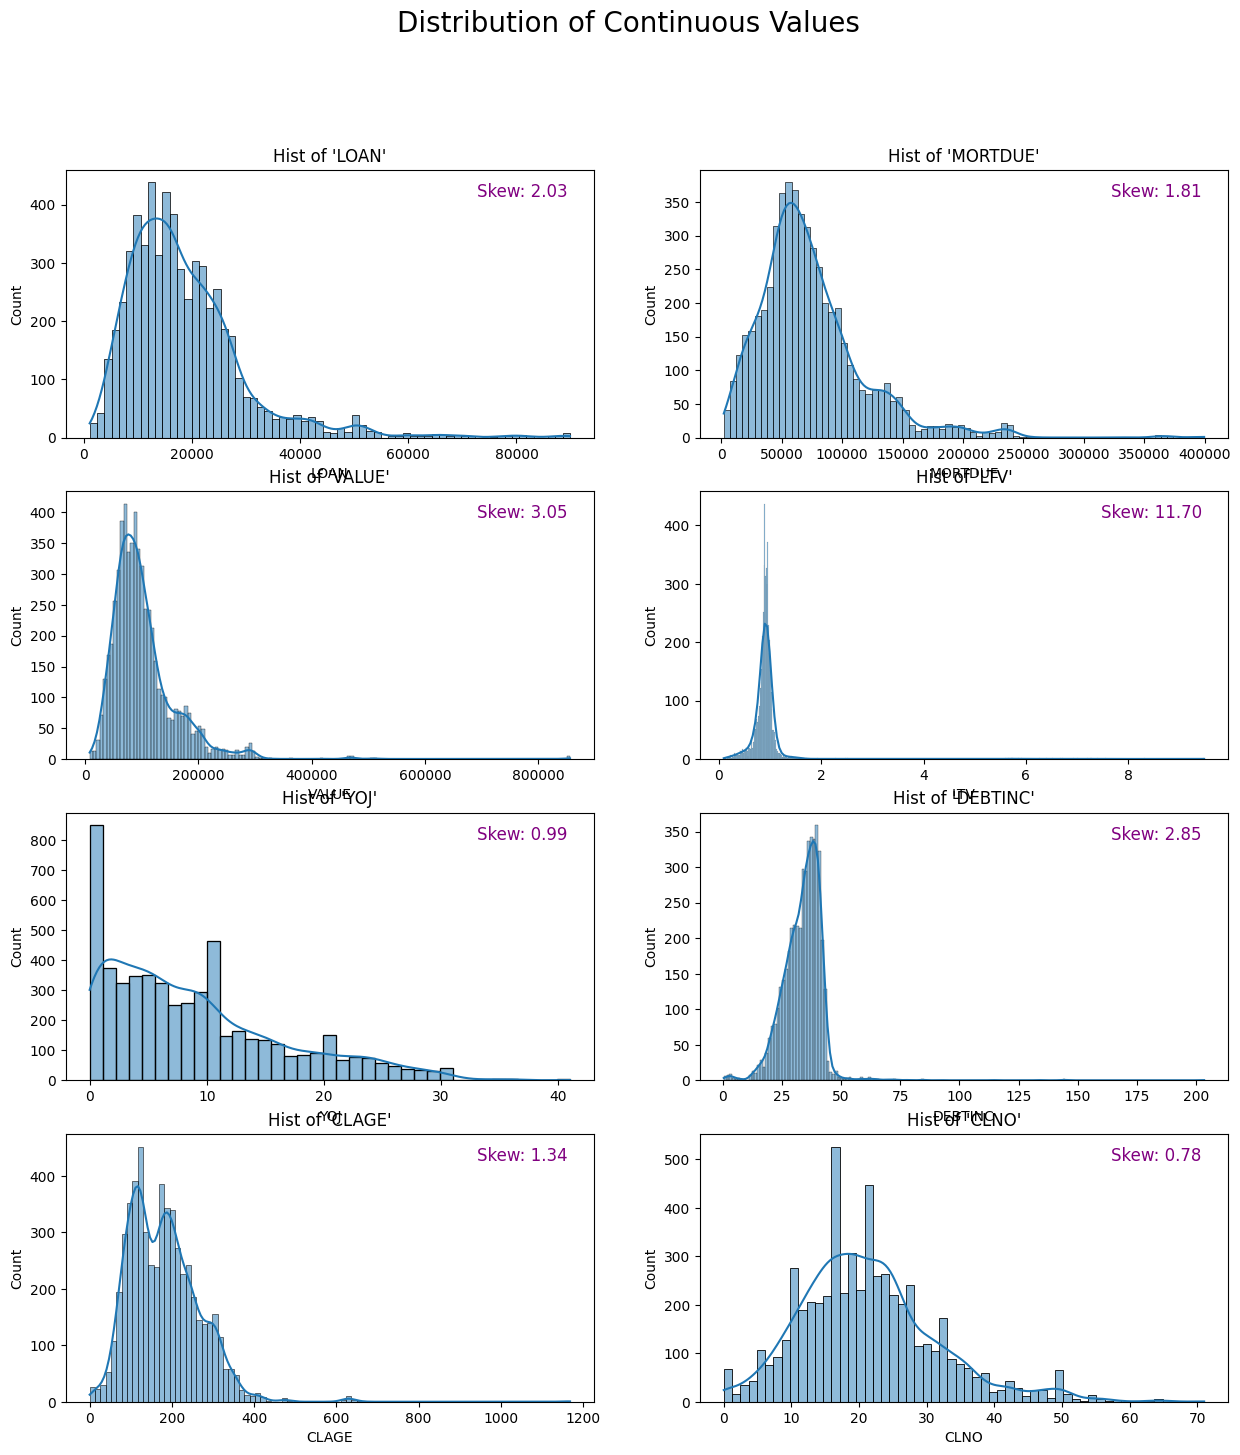

In [ ]:
columns = ['LOAN', 'MORTDUE', 'VALUE', 'LTV', 'YOJ', 'DEBTINC', 'CLAGE', 'CLNO']

# Subplots
num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize= (15, 4 * num_rows))
fig.suptitle("Distribution of Continuous Values", fontsize= 20)

for id, column in enumerate(columns):
  row_id = id // 2
  col_id = id % 2

  # Hist
  sns.histplot(df_cleaned[column], ax= axes[row_id, col_id], kde= True)
  axes[row_id, col_id].set_title(f"Hist of '{column}'")

  # Calc Skew
  skew_value = df_cleaned[column].skew()
  axes[row_id, col_id].text(0.95, 0.9, f"Skew: {skew_value:.2f}", transform= axes[row_id, col_id].transAxes, horizontalalignment= 'right', fontsize= 12, color= 'purple')

Some continuous values are skewed heavily will have to normalize later

Fill categorical values with other variables

In [ ]:
df_cleaned2 = df_cleaned.copy()

In [ ]:
categorical_missing = ['REASON', 'JOB']

df_cleaned2['REASON'] = df_cleaned2["REASON"].fillna('Other')
df_cleaned2['JOB'] = df_cleaned2["JOB"].fillna('Other')

Imputing all values besides reason and job

In [ ]:
hmeq_df3 = df_cleaned.copy()
hmeq_df3.drop(columns= ['REASON', 'JOB'], inplace= True)

In [ ]:
imputer = IterativeImputer(max_iter= 15, random_state= 42)

imputed_data = imputer.fit_transform(hmeq_df3)

hmeq_imputed = pd.DataFrame(imputed_data, columns= hmeq_df3.columns)

print(hmeq_imputed)

      BAD     LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
0     1.0   1100.0  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   
1     1.0   1300.0  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0   
2     1.0   1500.0  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0   
3     0.0   1700.0  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0   
4     1.0   1700.0  30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   
...   ...      ...      ...       ...   ...    ...     ...         ...   ...   
5935  0.0  88900.0  57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0   
5936  0.0  89000.0  54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0   
5937  0.0  89200.0  54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0   
5938  0.0  89800.0  50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0   
5939  0.0  89900.0  48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0   

      CLNO    DEBTINC       LTV  
0    

Data is cleaned and imputed with values totaling to 5940 rows

In [ ]:
hmeq_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5940 non-null   float64
 1   LOAN     5940 non-null   float64
 2   MORTDUE  5940 non-null   float64
 3   VALUE    5940 non-null   float64
 4   YOJ      5940 non-null   float64
 5   DEROG    5940 non-null   float64
 6   DELINQ   5940 non-null   float64
 7   CLAGE    5940 non-null   float64
 8   NINQ     5940 non-null   float64
 9   CLNO     5940 non-null   float64
 10  DEBTINC  5940 non-null   float64
 11  LTV      5940 non-null   float64
dtypes: float64(12)
memory usage: 557.0 KB


Change values types to int for numerical variables

In [ ]:
hmeq_imputed[hmeq_imputed.columns] = hmeq_imputed[hmeq_imputed.columns].astype(int)

insert categoriacal variables back into the imputed data

In [ ]:
insert_cat = 6

columns_insert = ['REASON', 'JOB']

columns_insert_values = df_cleaned2[columns_insert].values

for ix, column_name in enumerate(columns_insert):
  hmeq_imputed.insert(insert_cat + ix, column_name, columns_insert_values[:, ix])

In [ ]:
hmeq_imputed

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,REASON,JOB,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
0,1,1100,25860,39025,10,0,HomeImp,Other,0,94,1,9,36,0
1,1,1300,70053,68400,7,0,HomeImp,Other,2,121,0,14,37,1
2,1,1500,13500,16700,4,0,HomeImp,Other,0,149,1,10,36,0
3,0,1700,97800,112000,3,0,HomeImp,Office,0,93,0,14,32,0
4,1,1700,30548,40320,9,0,HomeImp,Other,0,101,1,8,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,0,88900,57264,90185,16,0,DebtCon,Other,0,221,0,16,36,1
5936,0,89000,54576,92937,16,0,DebtCon,Other,0,208,0,15,35,1
5937,0,89200,54045,92924,15,0,DebtCon,Other,0,212,0,15,35,1
5938,0,89800,50370,91861,14,0,DebtCon,Other,0,213,0,16,34,1


Created crosstabs on categorical variables

In [ ]:
pd.crosstab(hmeq_imputed.REASON, hmeq_imputed.BAD)

BAD,0,1
REASON,,
DebtCon,3181,743
HomeImp,1381,396
Other,195,44


In [ ]:
pd.crosstab(hmeq_imputed.JOB, hmeq_imputed.BAD)

BAD,0,1
JOB,,
Mgr,588,179
Office,823,125
Other,2076,571
ProfExe,1064,212
Sales,71,38
Self,135,58


Check values counts of bad loans 1 being defaulted and 0 being paid off loans

In [ ]:
hmeq_imputed['BAD'].value_counts()

0    4757
1    1183
Name: BAD, dtype: int64

Winsorizing Skewed Values to normalize the data

In [ ]:
from scipy.stats.mstats import winsorize

winsorized_clage = winsorize(hmeq_imputed['CLAGE'], (0, 0.05))
winsorized_value = winsorize(hmeq_imputed['VALUE'], (0, 0.05))
winsorized_mortdue = winsorize(hmeq_imputed['MORTDUE'], (0, 0.05))
winsorized_debtinc = winsorize(hmeq_imputed['DEBTINC'], (0, 0.05))

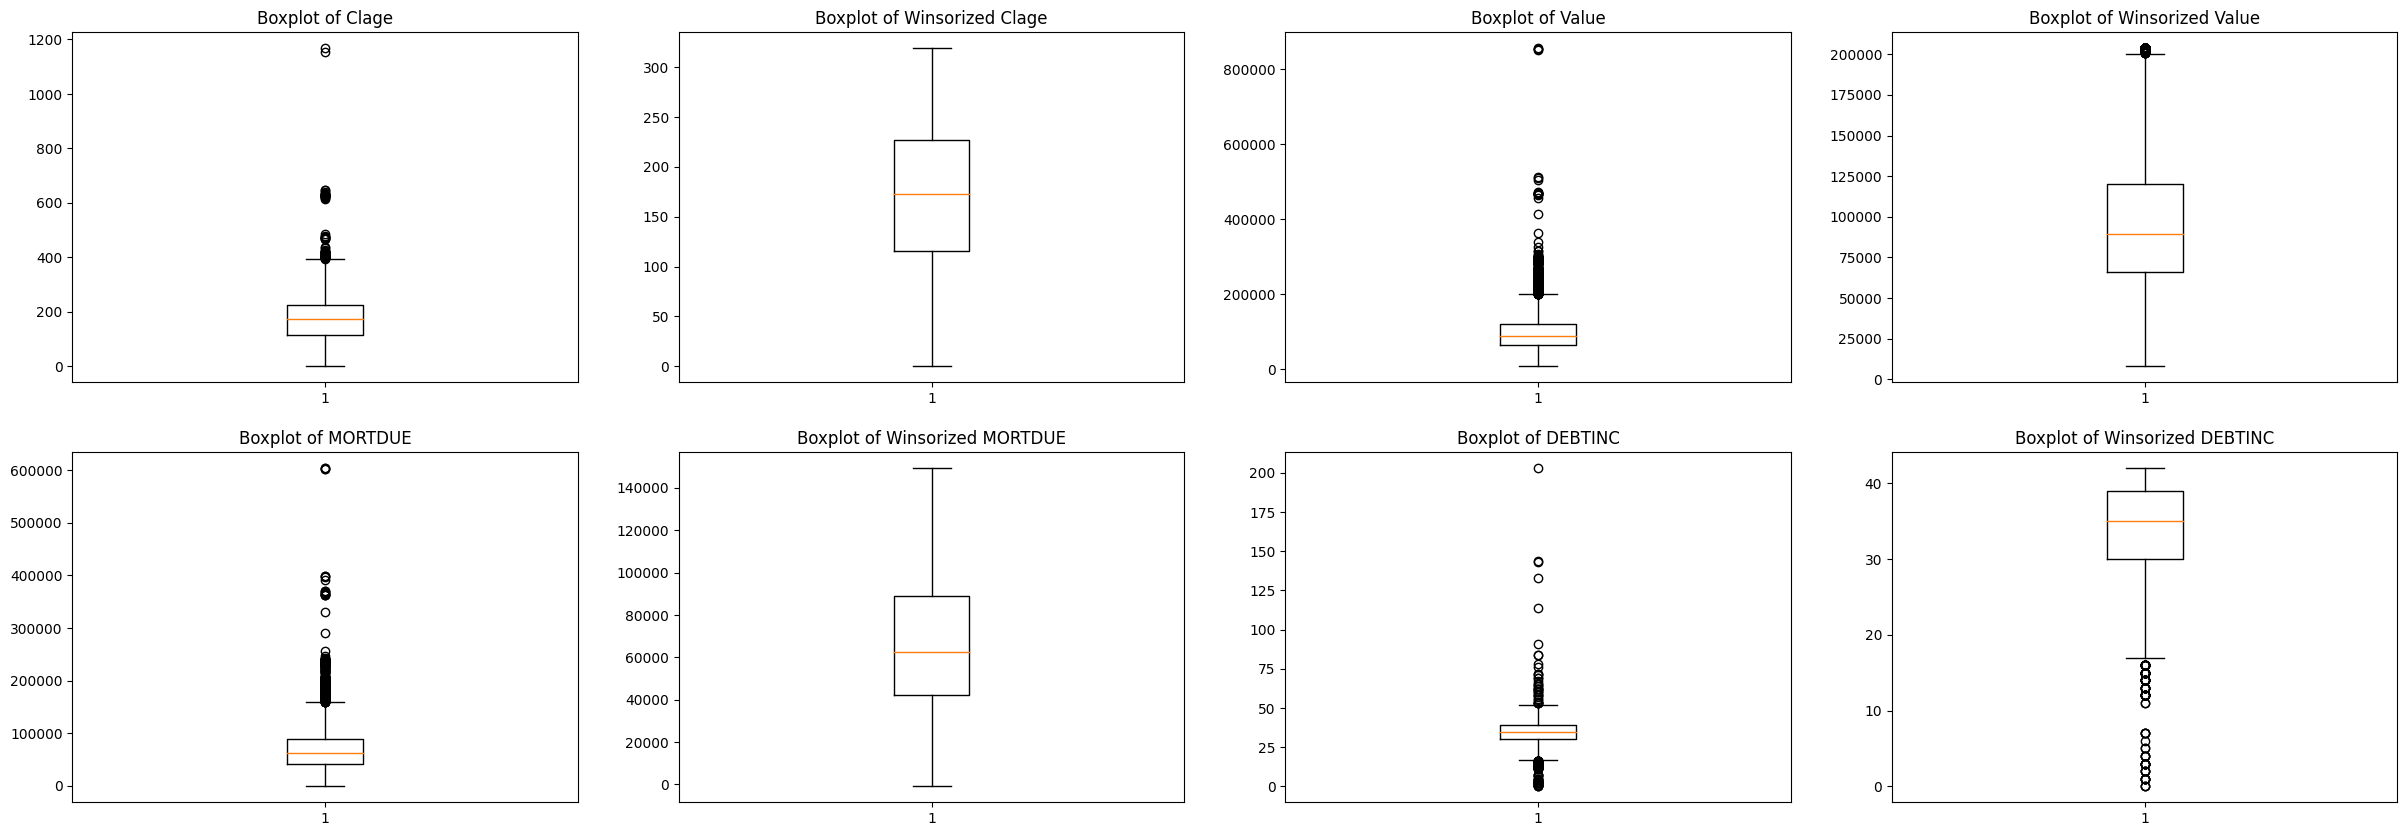

In [ ]:
plt.figure(figsize = (30, 10))

plt.subplot(2, 4, 1)
plt.boxplot(hmeq_imputed['CLAGE'])
plt.title('Boxplot of Clage')

plt.subplot(2, 4, 2)
plt.boxplot(winsorized_clage)
plt.title('Boxplot of Winsorized Clage')

plt.subplot(2, 4, 3)
plt.boxplot(hmeq_imputed['VALUE'])
plt.title('Boxplot of Value')

plt.subplot(2, 4, 4)
plt.boxplot(winsorized_value)
plt.title('Boxplot of Winsorized Value')

plt.subplot(2, 4, 5)
plt.boxplot(hmeq_imputed['MORTDUE'])
plt.title('Boxplot of MORTDUE')

plt.subplot(2, 4, 6)
plt.boxplot(winsorized_mortdue)
plt.title('Boxplot of Winsorized MORTDUE')

plt.subplot(2, 4, 7)
plt.boxplot(hmeq_imputed['DEBTINC'])
plt.title('Boxplot of DEBTINC')

plt.subplot(2, 4, 8)
plt.boxplot(winsorized_debtinc)
plt.title('Boxplot of Winsorized DEBTINC')
plt.show()

Winsorizing these values improved skewness and normalized the data

Created new variables that will be used in our model

In [ ]:
hmeq_imputed['winsorized_clage'] = winsorized_clage
hmeq_imputed['winsorized_value'] = winsorized_value
hmeq_imputed['winsorized_mortdue'] = winsorized_mortdue
hmeq_imputed['winsorized_debtinc'] = winsorized_debtinc

Change derog and delinq to binary variables

In [ ]:
# Binary vars for DEROG and DELINQ

hmeq_imputed['b_derog'] = (hmeq_imputed["DEROG"]>=1)* 1
hmeq_imputed['b_delinq'] = (hmeq_imputed["DELINQ"]>=1)* 1

Corr plot of all values and deciding which variables correlate the most to BAD our dependent variable

Text(0.5, 1.0, 'Correlation Matix of Home Equity Loans')

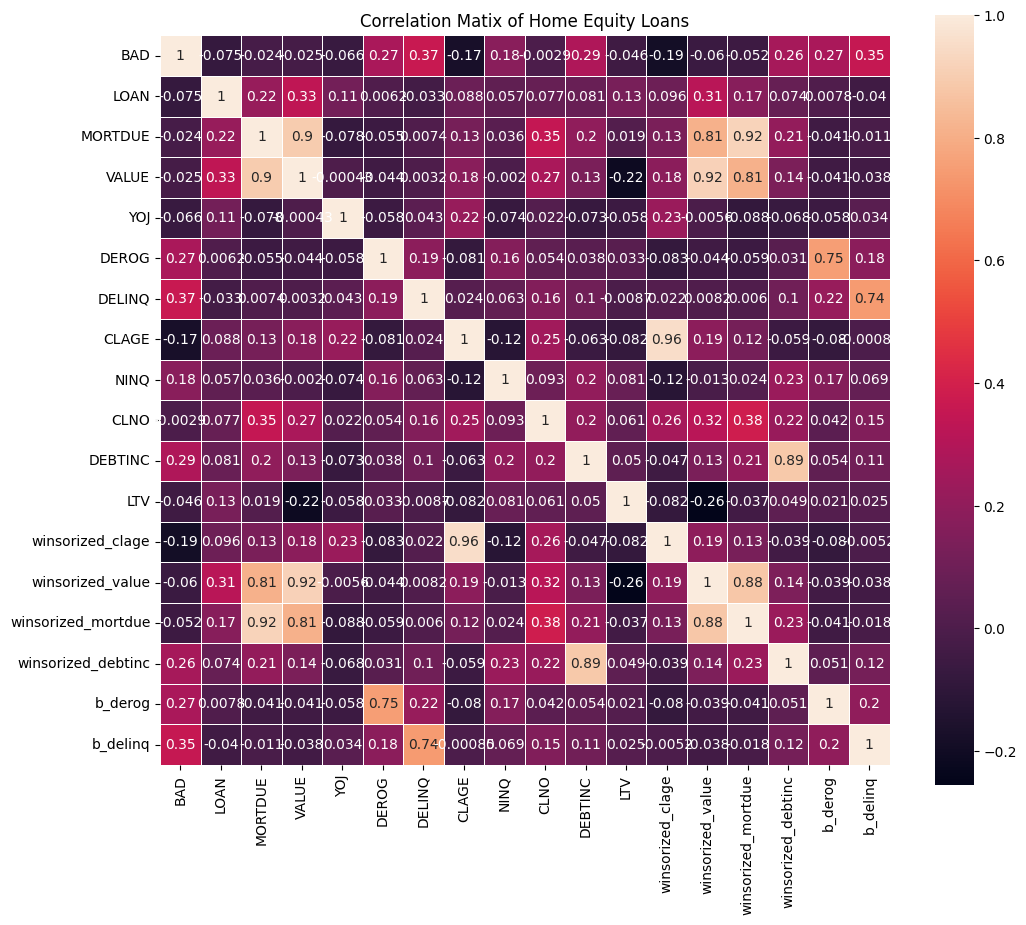

In [ ]:
# Correlation Plot
corrmat_hmeq = hmeq_imputed.corr()

plt.figure(figsize= (40, 10))

plt.subplot(1, 3, 1)
sns.heatmap(corrmat_hmeq, square= True, annot= True, linewidths= .5)
plt.title("Correlation Matix of Home Equity Loans")

### Encode significant categorical variables.

In [ ]:
categorical = []

for column in hmeq_imputed.columns:
  if len(hmeq_imputed[column].unique()) < 7:
    categorical.append(column)

In [ ]:
from scipy import stats

def barplots(categorical, target):
  i = 0
  title = "Average of: " + str(target)

  while i < len(categorical):
    plt.figure(figsize = (18, 6))

    plt.subplot(1, 3, 1)
    sns.barplot(x = hmeq_imputed[categorical[i]], y = hmeq_imputed[target])
    plt.setp(plt.gca().get_xticklabels(), rotation= 45, horizontalalignment= 'right')
    plt.title(title)

    if i+1 < len(categorical):
      plt.subplot(1, 3, 2)
      sns.barplot(x = hmeq_imputed[categorical[i+1]], y = hmeq_imputed[target])
      plt.setp(plt.gca().get_xticklabels(), rotation= 45, horizontalalignment= 'right')
      plt.title(title)

    if i+2 < len(categorical):
      plt.subplot(1, 3, 3)
      sns.barplot(x = hmeq_imputed[categorical[i+2]], y = hmeq_imputed[target])
      plt.setp(plt.gca().get_xticklabels(), rotation= 45, horizontalalignment= 'right')
      plt.title(title)

    plt.show()

    i += 3

def statdifference(catvariables, target):

  for categoricalvar in catvariables:
    values = hmeq_imputed[categoricalvar].unique()

    print("*----------------------------------*")
    print("Comaprison of variables: {} and {}".format(target, categoricalvar))
    print("*----------------------------------*")

    for i in range(0, len(values)):
      for j in range(i+1, len(values)):
        print("t-test between groups {0} and {1}: ".format(values[i], values[j]))
        print(stats.ttest_ind(hmeq_imputed[hmeq_imputed[categoricalvar]==values[i]][target], hmeq_imputed[hmeq_imputed[categoricalvar]==values[j]][target]))

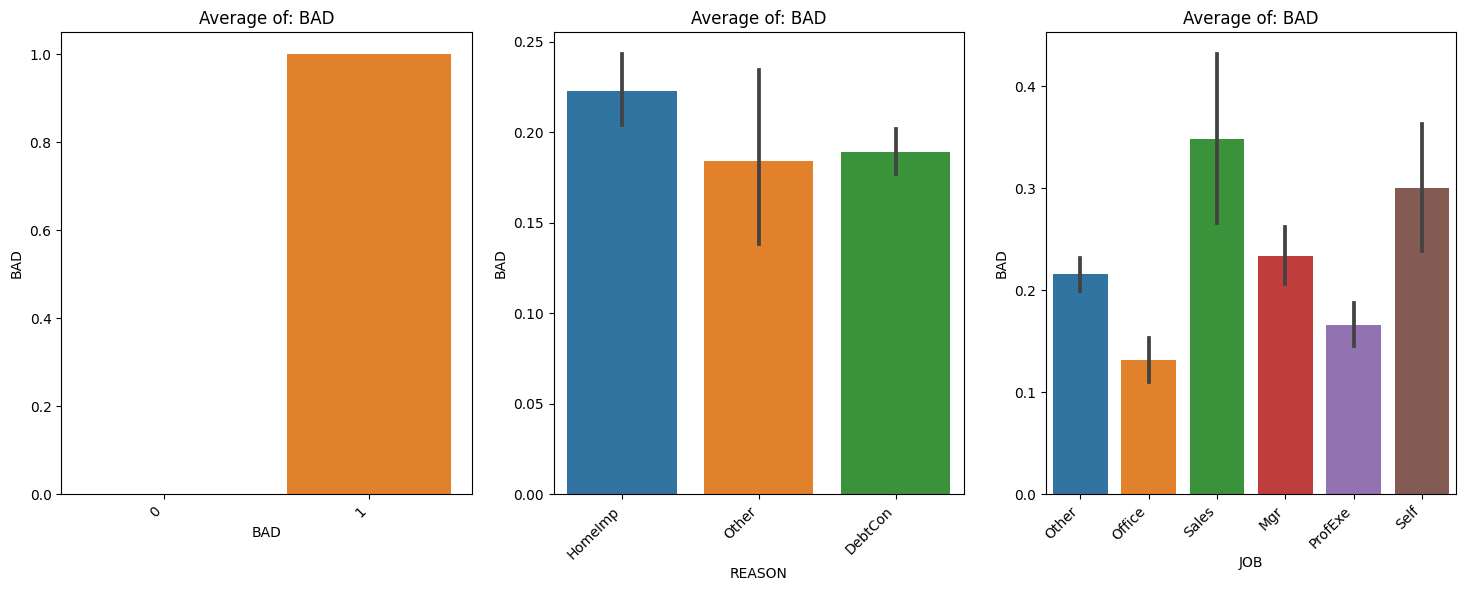

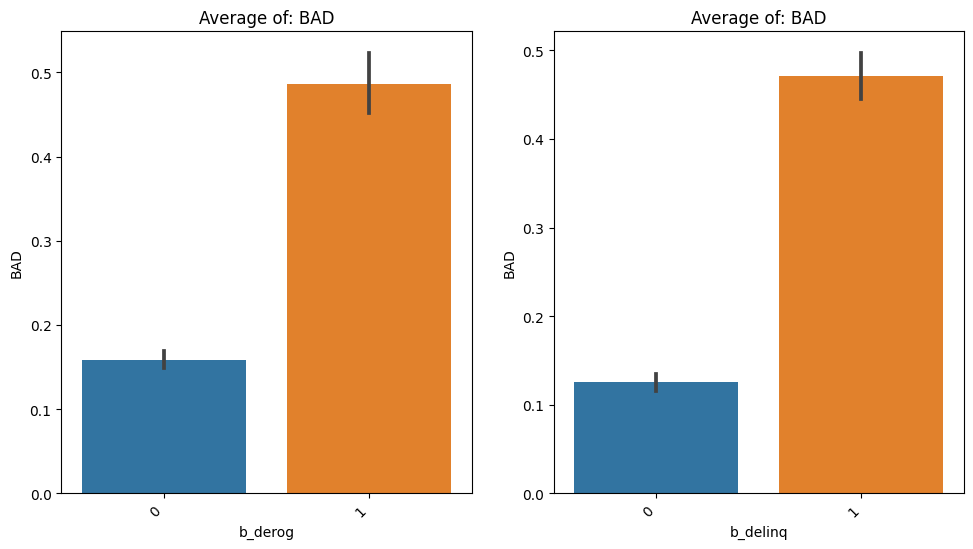

In [ ]:
barplots(categorical, 'BAD')

### The job, reason, and derog and delinq are significant varaibles in predicting BAD loans.

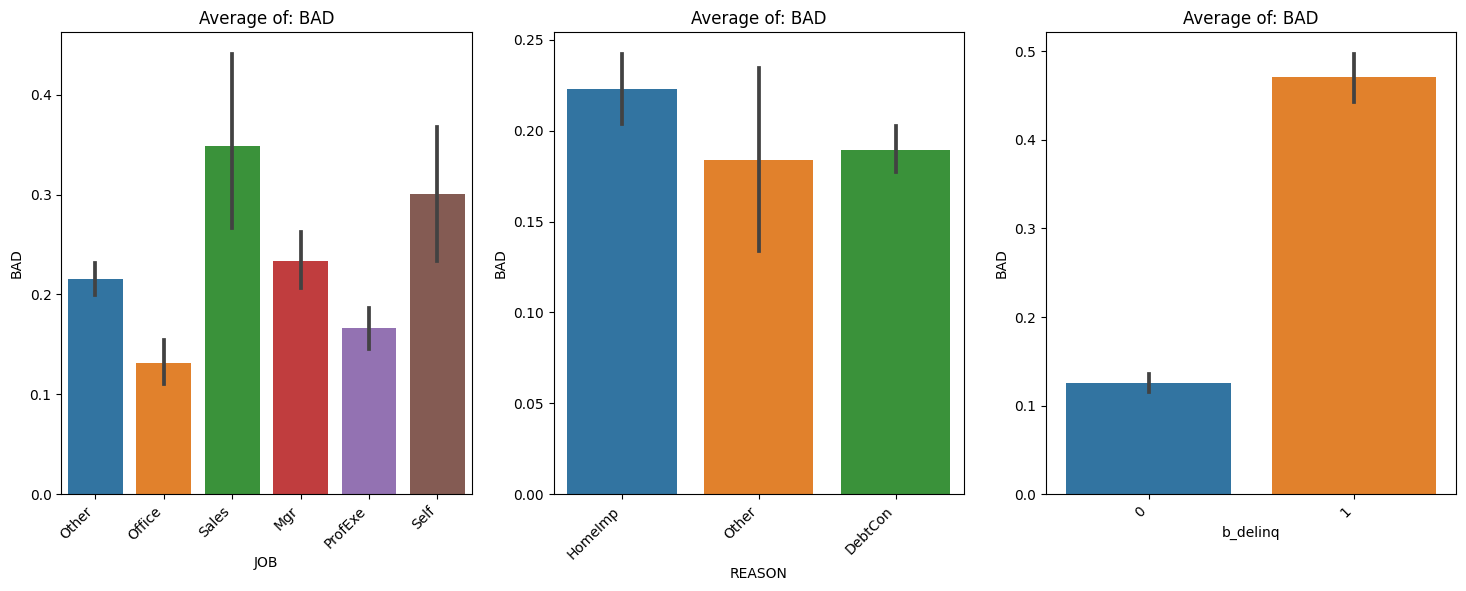

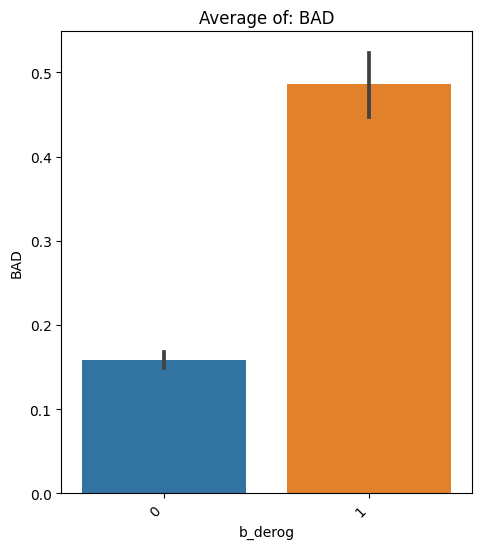

In [ ]:
selectedvars = ['JOB', 'REASON', 'b_delinq', 'b_derog']

barplots(selectedvars, 'BAD')

Checking for statistical difference bewteen groups of the BAD loans

In [ ]:
statdifference(selectedvars, 'BAD')

*----------------------------------*
Comaprison of variables: BAD and JOB
*----------------------------------*
t-test between groups Other and Office: 
TtestResult(statistic=5.630411096122544, pvalue=1.935608771578286e-08, df=3593.0)
t-test between groups Other and Sales: 
TtestResult(statistic=-3.2828160643298125, pvalue=0.0010405989441103758, df=2754.0)
t-test between groups Other and Mgr: 
TtestResult(statistic=-1.0400705269636044, pvalue=0.2983808292318746, df=3412.0)
t-test between groups Other and ProfExe: 
TtestResult(statistic=3.6443759005403416, pvalue=0.00027151432413875483, df=3921.0)
t-test between groups Other and Self: 
TtestResult(statistic=-2.741724417539634, pvalue=0.006150086068224043, df=2838.0)
t-test between groups Office and Sales: 
TtestResult(statistic=-6.030223114594371, pvalue=2.261761772113268e-09, df=1055.0)
t-test between groups Office and Mgr: 
TtestResult(statistic=-5.518996921576856, pvalue=3.931619659809391e-08, df=1713.0)
t-test between groups Office a

### Encoded categorical variables.

In [ ]:
dummy_column_names = []

for varcat in selectedvars:

  dropFirst = False

  if len(hmeq_imputed[varcat].unique()) == 2:
    dropFirst = True

  hmeq_imputed = pd.concat([hmeq_imputed, pd.get_dummies(hmeq_imputed[varcat], prefix= varcat, drop_first=dropFirst)], axis= 1)
  dummy_column_names = dummy_column_names + list(pd.get_dummies(hmeq_imputed[varcat], prefix= varcat, drop_first=dropFirst).columns)

In [ ]:
hmeq_imputed['JOB'].unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

In [ ]:
dummy_column_names

['JOB_Mgr',
 'JOB_Office',
 'JOB_Other',
 'JOB_ProfExe',
 'JOB_Sales',
 'JOB_Self',
 'REASON_DebtCon',
 'REASON_HomeImp',
 'REASON_Other',
 'b_delinq_1',
 'b_derog_1']

### We see that our dataset has zero null values.

All Nulls are in light green



<Axes: >

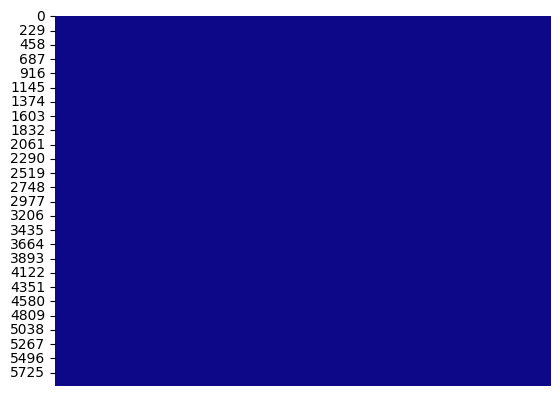

In [ ]:
# Clean selected features

print('All Nulls are in light green\n')

sns.heatmap(hmeq_imputed.isnull(), xticklabels= False, cbar= False, cmap='plasma')

Check Skewness

In [ ]:
columns = ['LOAN', 'winsorized_value', 'winsorized_mortdue', 'winsorized_clage', 'CLNO', 'winsorized_debtinc']
skewness = hmeq_imputed[columns].skew()
print(skewness)

LOAN                  2.025198
winsorized_value      0.803177
winsorized_mortdue    0.603277
winsorized_clage      0.284410
CLNO                  0.801738
winsorized_debtinc   -1.191801
dtype: float64


Data is normalized and no skewness

In [ ]:
hmeq_imputed

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,REASON,JOB,DELINQ,CLAGE,...,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_DebtCon,REASON_HomeImp,REASON_Other,b_delinq_1,b_derog_1
0,1,1100,25860,39025,10,0,HomeImp,Other,0,94,...,0,1,0,0,0,0,1,0,0,0
1,1,1300,70053,68400,7,0,HomeImp,Other,2,121,...,0,1,0,0,0,0,1,0,1,0
2,1,1500,13500,16700,4,0,HomeImp,Other,0,149,...,0,1,0,0,0,0,1,0,0,0
3,0,1700,97800,112000,3,0,HomeImp,Office,0,93,...,1,0,0,0,0,0,1,0,0,0
4,1,1700,30548,40320,9,0,HomeImp,Other,0,101,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,0,88900,57264,90185,16,0,DebtCon,Other,0,221,...,0,1,0,0,0,1,0,0,0,0
5936,0,89000,54576,92937,16,0,DebtCon,Other,0,208,...,0,1,0,0,0,1,0,0,0,0
5937,0,89200,54045,92924,15,0,DebtCon,Other,0,212,...,0,1,0,0,0,1,0,0,0,0
5938,0,89800,50370,91861,14,0,DebtCon,Other,0,213,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
correlation = hmeq_imputed.corr()
cor_target = abs(correlation['BAD'])
cor_target.sort_values(ascending= False)

BAD                   1.000000
DELINQ                0.366913
b_delinq_1            0.354485
b_delinq              0.354485
DEBTINC               0.288242
DEROG                 0.274041
b_derog               0.269176
b_derog_1             0.269176
winsorized_debtinc    0.260863
winsorized_clage      0.190554
NINQ                  0.178640
CLAGE                 0.173993
LOAN                  0.074863
JOB_Office            0.073438
YOJ                   0.066374
winsorized_value      0.060213
winsorized_mortdue    0.052306
JOB_Sales             0.051169
JOB_Self              0.046511
LTV                   0.046003
JOB_ProfExe           0.043239
REASON_HomeImp        0.038754
JOB_Other             0.037171
REASON_DebtCon        0.034272
JOB_Mgr               0.032993
VALUE                 0.025357
MORTDUE               0.023556
REASON_Other          0.007720
CLNO                  0.002873
Name: BAD, dtype: float64

In [ ]:
# Final Correlation

# Correlation Plot
hmeq_imputed.corr(method= 'pearson')

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_DebtCon,REASON_HomeImp,REASON_Other,b_delinq_1,b_derog_1
BAD,1.000000,-0.074863,-0.023556,-0.025357,-0.066374,0.274041,0.366913,-0.173993,0.178640,-0.002873,...,-0.073438,0.037171,-0.043239,0.051169,0.046511,-0.034272,0.038754,-0.007720,0.354485,0.269176
LOAN,-0.074863,1.000000,0.218301,0.334243,0.114335,0.006209,-0.033128,0.087770,0.056967,0.076753,...,-0.019026,-0.055869,0.016396,-0.045348,0.158277,0.165397,-0.152974,-0.042088,-0.040171,0.007794
MORTDUE,-0.023556,0.218301,1.000000,0.896425,-0.078027,-0.055135,0.007434,0.126715,0.035692,0.350210,...,-0.055430,-0.273280,0.260455,0.024020,0.098109,0.053917,-0.040703,-0.035074,-0.010537,-0.041403
VALUE,-0.025357,0.334243,0.896425,1.000000,-0.000432,-0.043766,0.003217,0.176293,-0.001982,0.271702,...,-0.058557,-0.264836,0.264941,0.016597,0.150071,0.008500,-0.003236,-0.012940,-0.037922,-0.040773
YOJ,-0.066374,0.114335,-0.078027,-0.000432,1.000000,-0.057666,0.042831,0.217231,-0.073881,0.022196,...,-0.027525,0.048692,-0.014734,-0.042427,-0.045246,-0.058494,0.053074,0.017277,0.034004,-0.058445
DEROG,0.274041,0.006209,-0.055135,-0.043766,-0.057666,1.000000,0.186870,-0.081030,0.162618,0.053802,...,-0.048639,0.035830,-0.035313,0.031855,0.000355,0.003770,-0.009360,0.012724,0.183785,0.754291
DELINQ,0.366913,-0.033128,0.007434,0.003217,0.042831,0.186870,1.000000,0.024303,0.063256,0.160498,...,0.003368,-0.040617,-0.005859,-0.014675,0.022965,-0.013341,0.007034,0.015756,0.742177,0.216249
CLAGE,-0.173993,0.087770,0.126715,0.176293,0.217231,-0.081030,0.024303,1.000000,-0.118673,0.248521,...,0.001836,-0.083497,0.112745,0.026848,-0.010378,-0.067697,0.050064,0.046464,-0.000853,-0.080451
NINQ,0.178640,0.056967,0.035692,-0.001982,-0.073881,0.162618,0.063256,-0.118673,1.000000,0.092911,...,-0.057494,0.044790,-0.055441,-0.031266,0.007024,0.137533,-0.118166,-0.056055,0.068823,0.165247
CLNO,-0.002873,0.076753,0.350210,0.271702,0.022196,0.053802,0.160498,0.248521,0.092911,1.000000,...,-0.002377,-0.203244,0.167014,0.049936,0.033822,0.120685,-0.103124,-0.050508,0.152164,0.041500


Selected X variables for our model

In [ ]:
X = hmeq_imputed[['LOAN', 'winsorized_clage', 'winsorized_value', 'winsorized_debtinc', 'winsorized_mortdue', 'NINQ', 'YOJ'] + dummy_column_names]

y = hmeq_imputed['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 42)

### First model is Logistic Regression with l2 regularization and are looking for best parameters for Logistic Regression. We want our model to tune for highest recall because we want to find out if our data can predict whether a home equity loan will default. Finding best parameters for train set.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Highest Accuracy
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver= solvers, penalty= penalty, C= c_values)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 1)
grid_search= GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'accuracy', error_score= 0)
grid_results= grid_search.fit(X, y)
# Summarize
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844725 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.844220 (0.012856) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804489 (0.007296) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.803704 (0.006248) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.844220 (0.011957) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804377 (0.007292) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802862 (0.007067) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.844725 (0.013038) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804602 (0.006954) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802581 (0.006100) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.843771 (0.012721) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804265 (0.006968) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.803030 (0.006023) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.837262 (0.008522) wit

In [ ]:
# Highest recall

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver= solvers, penalty= penalty, C= c_values)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 1)
grid_search= GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'recall', error_score= 0)
grid_results= grid_search.fit(X, y)
# Summarize
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.404617 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.404055 (0.046019) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.095497 (0.034305) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.067063 (0.029552) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.403782 (0.044915) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.095217 (0.034225) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.060625 (0.032636) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.404617 (0.047359) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.096067 (0.033353) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.060628 (0.036515) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.388553 (0.046392) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.095217 (0.033873) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.058363 (0.028633) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.288807 (0.035760) wit

### Second model is Random Forest Classifier finding best parameters to run for train set.

In [ ]:
# Highest Accuracy

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators, max_features= max_features)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 2)
grid_search = GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'accuracy', error_score= 0)
grid_results= grid_search.fit(X, y)

# Summarize the results
print('Best: %f using %s' % (grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.933053 using {'max_features': 'log2', 'n_estimators': 1000}
0.916554 (0.007904) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.931089 (0.007665) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.932379 (0.007981) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.917677 (0.008148) with: {'max_features': 'log2', 'n_estimators': 10}
0.932267 (0.007562) with: {'max_features': 'log2', 'n_estimators': 100}
0.933053 (0.007098) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators, max_features= max_features)
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state= 2)
grid_search = GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'recall', error_score= 0)
grid_results= grid_search.fit(X, y)

# Summarize the results
print('Best: %f using %s' % (grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.701090 using {'max_features': 'log2', 'n_estimators': 1000}
0.627247 (0.039118) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.694877 (0.039505) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.700805 (0.038908) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.624678 (0.040053) with: {'max_features': 'log2', 'n_estimators': 10}
0.694889 (0.039811) with: {'max_features': 'log2', 'n_estimators': 100}
0.701090 (0.039933) with: {'max_features': 'log2', 'n_estimators': 1000}


### Third model is Gradient Boosting Classifier finding best parameters to run train set.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier()
learning_rate= [0.05, 0.1, 0.15]
subsample = [0.7, 1]
n_estimators = [100, 1000]
max_depth = [4, 7, 9]
grid= dict(learning_rate= learning_rate, n_estimators= n_estimators, subsample= subsample, max_features= max_features, max_depth= max_depth)
cv= RepeatedStratifiedKFold(n_splits= 5, n_repeats= 3, random_state= 2)
grid_search= GridSearchCV(estimator= model, param_grid= grid, n_jobs= -1, cv= cv, scoring= 'accuracy', error_score= 0)
grid_results= grid_search.fit(X, y)
# Summarize
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.945679 using {'learning_rate': 0.15, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 1000, 'subsample': 0.7}
0.880079 (0.005002) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.7}
0.881650 (0.005357) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 1}
0.930022 (0.005733) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 1000, 'subsample': 0.7}
0.929686 (0.005887) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 1000, 'subsample': 1}
0.880135 (0.007154) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100, 'subsample': 0.7}
0.881257 (0.005762) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100, 'subsample': 1}
0.930079 (0.005220) with: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'log2', 'n_estimators':

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic regression training and test scores

In [ ]:
# Confusion Matrix of Best Models using train and testing sets

lr = LogisticRegression(solver= 'newton-cg', penalty= 'l2', C= 1)
lr.fit(X_train, y_train)

predict_test = lr.predict(X_test)

lr.score(X_test, y_test)

0.8498316498316498

In [ ]:
precision_score(y_test, predict_test)

0.6894736842105263

In [ ]:
recall_score(y_test, predict_test)

0.4440677966101695

Confusion matrix, without normalization


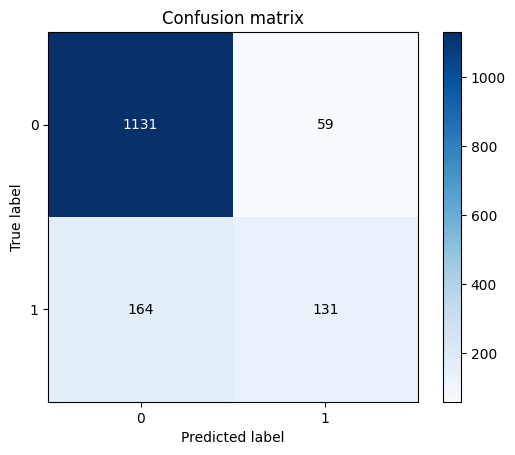

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


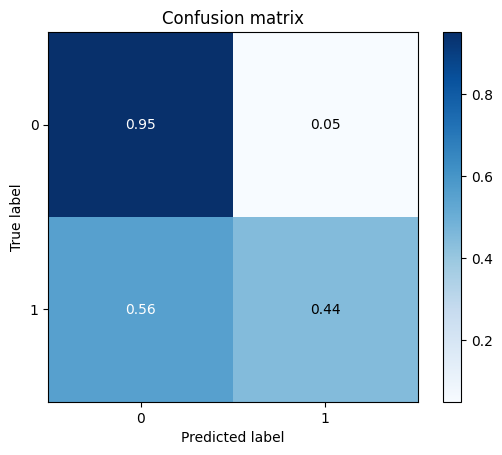

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

### Random Forest training and test set scores

In [ ]:
rfc = RandomForestClassifier(max_features= 'log2', n_estimators= 1000)
rfc.fit(X_train, y_train)

predict_test = rfc.predict(X_test)

rfc.score(X_test, y_test)

0.934006734006734

In [ ]:
precision_score(y_test, predict_test)

0.9539170506912442

In [ ]:
recall_score(y_test, predict_test)

0.7016949152542373

Confusion matrix, without normalization


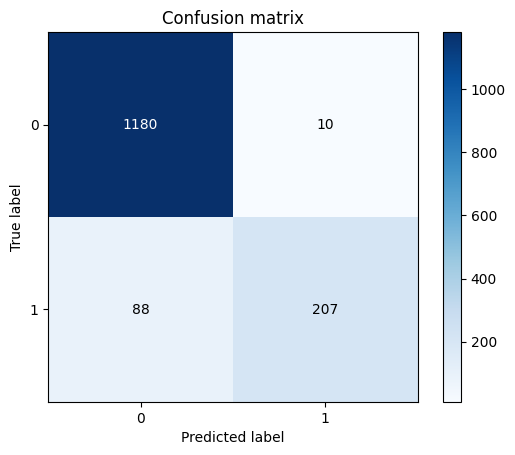

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, [0,1],False)

Normalized confusion matrix


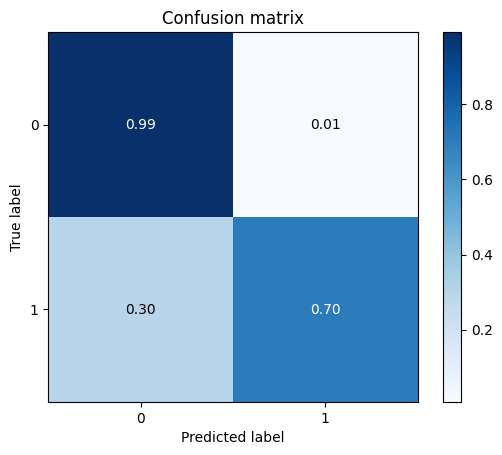

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, [0,1],True)

### Third model is Gradient Boosting Classifier with tuned parameters to maximize our accuracy and recall score on the training and test sets

In [ ]:
# You'll make 1000 iterations, use 7-deep trees, and set your loss function.

# It's best to update this table for the drill
# at the end of the lesson.
from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators': 1000,
          'max_depth': 7,
          'loss': 'log_loss',
          'subsample': 0.7,
          'learning_rate' : 0.15}

# Initialize and fit the model.
clf = GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

clf.score(X_test, y_test)

0.9474747474747475

In [ ]:
precision_score(y_test, predict_test)

0.9656652360515021

In [ ]:
recall_score(y_test, predict_test)

0.7627118644067796

Confusion matrix, without normalization


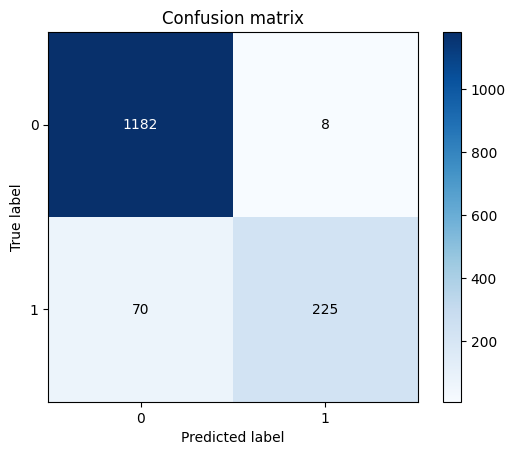

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


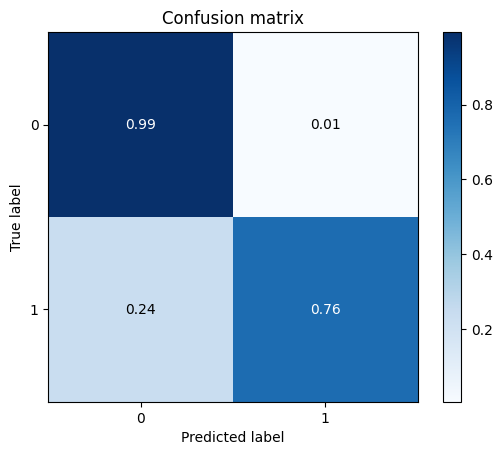

In [ ]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm, [0, 1], True)

### Considering the limited amount of data we obtained we managed to get a recall score around 45% and an accuracy around 95.2% which is good considering the amount of data we obtained.

<Axes: >

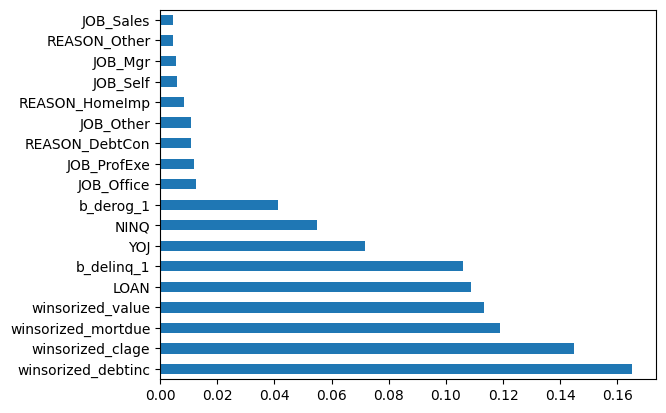

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Our best model by far was the Gradient boosting model which performed decently well with the amount of data we obtained. Our precision was near 100% and our recall around 76%. More data could lead to better models and have an even greater efect on whether banks should approve home equity loans for customers. Thank you for looking over more analysis and I hope this was insightful and interesting.